In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mysql.connector
import datetime


In [2]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="$elgatonegro",
    database="kochbar_dataset"
)

In [3]:
cursor = mydb.cursor()

In [4]:
# we select 2 festival dates: Easter and Christmas; and 2 non festival dates one in summer and other in winter

# For each we are considering a timespan of 5 days

# data from 2013-03-27 to 2013-04-01
q_easter = "select country_region, city, recipe_id, target_link, SUBSTRING_INDEX(SUBSTRING_INDEX((SUBSTRING_INDEX(target_link, '/', -2)),'/',-1),'.',1)  recipe_name from logs_recipeids_utf8 where country = 'DE' and date between '2013-03-27 00:00:00' and '2013-04-02 00:00:00'"
#q_easter = "select country_region, city, recipe_id, target_link, SUBSTRING_INDEX(SUBSTRING_INDEX((SUBSTRING_INDEX(target_link, '/', -2)),'/',-1),'.',1)  recipe_name from logs_recipeids_utf8 where country = 'DE' and date between '2013-03-27 00:00:00' and '2013-03-27 01:00:00'"

# data from 2013-12-22 to 2013-12-26
q_christmas="select country_region, city, recipe_id, target_link, SUBSTRING_INDEX(SUBSTRING_INDEX((SUBSTRING_INDEX(target_link, '/', -2)),'/',-1),'.',1)  recipe_name from logs_recipeids_utf8 where country = 'DE' and date between '2013-12-22 00:00:00' and '2013-12-27 00:00:00'"
#q_christmas="select country_region, city, recipe_id, target_link, SUBSTRING_INDEX(SUBSTRING_INDEX((SUBSTRING_INDEX(target_link, '/', -2)),'/',-1),'.',1)  recipe_name from logs_recipeids_utf8 where country = 'DE' and date between '2013-12-22 00:00:00' and '2013-12-22 01:00:00'"

#data from 2014-07-18 to 2014-07-22
q_summer  = "select country_region, city, recipe_id, target_link, SUBSTRING_INDEX(SUBSTRING_INDEX((SUBSTRING_INDEX(target_link, '/', -2)),'/',-1),'.',1)  recipe_name from logs_recipeids_utf8 where country = 'DE' and date between '2013-07-18 00:00:00' and '2013-07-23 00:00:00'"
#q_summer  = "select country_region, city, recipe_id, target_link, SUBSTRING_INDEX(SUBSTRING_INDEX((SUBSTRING_INDEX(target_link, '/', -2)),'/',-1),'.',1)  recipe_name from logs_recipeids_utf8 where country = 'DE' and date between '2013-07-18 00:00:00' and '2013-07-18 01:00:00'"

#data from 2014-02-18 to 2014-02-22
q_winter=   "select country_region, city, recipe_id, target_link, SUBSTRING_INDEX(SUBSTRING_INDEX((SUBSTRING_INDEX(target_link, '/', -2)),'/',-1),'.',1)  recipe_name from logs_recipeids_utf8 where country = 'DE' and date between '2014-02-18 00:00:00' and '2014-02-23 00:00:00'"
#q_winter=   "select country_region, city, recipe_id, target_link, SUBSTRING_INDEX(SUBSTRING_INDEX((SUBSTRING_INDEX(target_link, '/', -2)),'/',-1),'.',1)  recipe_name from logs_recipeids_utf8 where country = 'DE' and date between '2014-02-18 00:00:00' and '2014-02-18 00:30:00'"

cols = ['country_region','city','recipe_id','target_link', 'recipe_name']



In [5]:
#extract from database, easter
cursor.execute(q_easter)

myresult = cursor.fetchall()

#put the data in a dataframe
df_e = pd.DataFrame(myresult, columns=cols)

#turn recipe name into lower case
df_e['recipe_name'] = df_e['recipe_name'].str.lower()

df_e.head()

,country_region,city,recipe_id,target_link,recipe_name
0,7,Willich,462277,/rezept/462277/Rollen-Mexicana.html,rollen-mexicana
1,7,Düsseldorf,107373,/rezept/107373/Fingerfood-fuer-Party.html,fingerfood-fuer-party
2,7,Köln,322162,/rezept/322162/Gulaschsuppe.html,gulaschsuppe
3,7,Köln,322162,/rezept/322162/Gulaschsuppe.html,gulaschsuppe
4,7,Bonn,425720,/rezept/425720/Olli-s-vegetarische-Nudelpfanne...,olli-s-vegetarische-nudelpfanne


In [6]:
#extract from database, Christmas
cursor.execute(q_christmas)
myresult = cursor.fetchall()

#put the data in a dataframe
df_c = pd.DataFrame(myresult, columns = cols)

#turn recipe name into lower case
df_c['recipe_name'] = df_c['recipe_name'].str.lower()

df_c.head()

,country_region,city,recipe_id,target_link,recipe_name
0,11,Falkensee,453429,/rezept/453429/Leckere-Lebkuchen-Lollis-mit-Sc...,leckere-lebkuchen-lollis-mit-schokoueberzug-ni...
1,1,Brühl,417557,/rezept/417557/Cornflakes-Kekse-einfaches-aber...,cornflakes-kekse-einfaches-aber-gut-schmeckend...
2,11,Falkensee,450104,/rezept/450104/Lebkuchenlollies-Lebkuchen-Lebk...,lebkuchenlollies-lebkuchen-lebkuchenpralinen
3,5,Frankfurt_Am_Main,117580,/rezept/117580/Auflauf-Bunter-Gemueseauflauf.html,auflauf-bunter-gemueseauflauf
4,1,Mannheim,403410,/rezept/403410/Ludwig-s-Nusszopf-2-grosse-Zoep...,ludwig-s-nusszopf-2-grosse-zoepfe


In [7]:
#extract from database, summer days
cursor.execute(q_summer)
myresult = cursor.fetchall()

#put the data in a dataframe
df_s = pd.DataFrame(myresult, columns=cols)

#turn recipe name into lower case
df_s['recipe_name'] = df_s['recipe_name'].str.lower()

df_s.head()

,country_region,city,recipe_id,target_link,recipe_name
0,14,Naumburg,212279,/rezept/212279/edler-mediteraner-Nudelsalat-zu...,edler-mediteraner-nudelsalat-zum-grillen
1,6,Aurich,210497,/rezept/210497/einfacher-Apfel-Zitonenkuchen.html,einfacher-apfel-zitonenkuchen
2,4,Hamburg,471715,/rezept/471715/Zigeunerschnitzel-a-la-Irmtraud...,zigeunerschnitzel-a-la-irmtraud
3,2,Passau,213681,/rezept/213681/Apfel-Scheiterhaufen.html,apfel-scheiterhaufen
4,7,Essen,341792,/rezept/341792/Pfifferlinge-Pfanne.html,pfifferlinge-pfanne


In [8]:
#extract from database, winter days
cursor.execute(q_winter)
myresult = cursor.fetchall()

#put the data in a dataframe
df_w = pd.DataFrame(myresult, columns = cols)

#turn recipe name into lower case
df_w['recipe_name'] = df_w['recipe_name'].str.lower()

df_w.head()

,country_region,city,recipe_id,target_link,recipe_name
0,7,Bonn,344977,/rezept/344977/Backwerk-Broeselkuchen.html,backwerk-broeselkuchen
1,4,Hamburg,253353,/rezept/253353/Hauptgericht-vegetarisch-Vegeta...,hauptgericht-vegetarisch-vegetarischer-flammku...
2,6,Braunschweig,410838,/rezept/410838/Herzhafter-Kartoffeleintopf.html,herzhafter-kartoffeleintopf
3,7,Soest,272437,/rezept/272437/Kuchen-Torte-Mohnkuchen-mit-Str...,kuchen-torte-mohnkuchen-mit-streusel-vom-blech
4,6,Braunschweig,410838,/rezept/410838/Herzhafter-Kartoffeleintopf.html,herzhafter-kartoffeleintopf


In [19]:
df_w.shape

# SAVE SQL RESULTS AS CSV

#df_w.to_csv(path_or_buf="df_w.csv")
#df_s.to_csv(path_or_buf="df_s.csv")
#df_e.to_csv(path_or_buf="df_e.csv")
#df_c.to_csv(path_or_buf="df_c.csv")



(1286953, 5)

In [6]:
#LOAD DATA FROM CSV

df_w = pd.read_csv('df_w.csv', index_col=0, dtype = {'country_region':'object','city':'object','recipe_id':'int64','target_link':'object', 'recipe_name':'object'} )
df_s = pd.read_csv('df_s.csv', index_col=0, dtype = {'country_region':'object','city':'object','recipe_id':'int64','target_link':'object', 'recipe_name':'object'} )
df_e = pd.read_csv('df_e.csv', index_col=0, dtype = {'country_region':'object','city':'object','recipe_id':'int64','target_link':'object', 'recipe_name':'object'} )
df_c = pd.read_csv('df_c.csv', index_col=0, dtype = {'country_region':'object','city':'object','recipe_id':'int64','target_link':'object', 'recipe_name':'object'} )

#df_w.head()

In [8]:
df_w.shape
df_s.shape
df_e.shape
df_c.shape

(1286953, 5)

(1084203, 5)

(1986723, 5)

(2491260, 5)

In [157]:
# function that calculates tf by region
def create_tf_by_region(df):    
    #extract regions from dataset
    regions = df['country_region'].tolist()

    #create a list of distinct regions, alphabetic order
    regions = sorted(set(regions))

    #create a list of distict recipe names, alphabetic order
    all_recipes = df['recipe_name'].tolist()
    all_recipes = sorted(set(all_recipes))


    #create a new dataset for store recipe names, by region
    df_tf = pd.DataFrame(regions, columns=['country_region'])
    df_tf.set_index('country_region', inplace=True)

    #add recipes as columns
    df_tf = df_tf.reindex(columns = all_recipes, fill_value=0)

    #fill the tf_Matrix
    for n in range ( len(df) ):
        df_tf.loc[ df.loc[n,'country_region'], df.loc[n,'recipe_name'] ] += 1
    
    return df_tf

In [151]:

#create term frequency by region, given distinct dataframes
tf_w = create_tf_by_region(df_w)
tf_s = create_tf_by_region(df_s)
tf_c = create_tf_by_region(df_c)
tf_e = create_tf_by_region(df_e)


In [155]:
#tf_w.to_csv(path_or_buf="tf_w_by_region.csv")
#tf_s.to_csv(path_or_buf="tf_s_by_region.csv")
#tf_c.to_csv(path_or_buf="tf_c_by_region.csv")
#tf_e.to_csv(path_or_buf="tf_e_by_region.csv")


recipe_name    1
dtype: int64

In [ ]:
# review size of the df (#of regions x number of distinct recipes)
tf_w.shape
tf_s.shape
tf_c.shape
tf_e.shape

In [ ]:
# calculate cosine similarity matrix, for each dataframe (by region)

sim_m_w = cosine_similarity(tf_w, tf_w)
sim_m_s = cosine_similarity(tf_s, tf_s)
sim_m_c = cosine_similarity(tf_c, tf_c)
sim_m_e = cosine_similarity(tf_e, tf_e)


In [18]:
#regions = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']

#df_sim_w = pd.DataFrame(sim_m_w,columns=regions)
#df_sim_w.index = regions

#df_sim_s = pd.DataFrame(sim_m_s,columns=regions)
#df_sim_s.index = regions

#df_sim_c = pd.DataFrame(sim_m_c,columns=regions)
#df_sim_c.index = regions

#df_sim_e = pd.DataFrame(sim_m_e,columns=regions)
#df_sim_e.index = regions


#df_sim_w.to_csv(path_or_buf="region_cos_sim_5days_winter.csv")
#df_sim_s.to_csv(path_or_buf="region_cos_sim_5days_summer.csv")
#df_sim_c.to_csv(path_or_buf="region_cos_sim_5days_christmas.csv")
#df_sim_e.to_csv(path_or_buf="region_cos_sim_5days_estern.csv")


In [15]:
def heat_plot(matrix, label, title, size, file_name_to_export):

    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.imshow(matrix, cmap = 'RdYlGn')
    
    # show all ticks...
    ax.set_xticks(np.arange(len(label)))
    ax.set_yticks(np.arange(len(label)))

    # label them 
    ax.set_xticklabels(label)
    ax.set_yticklabels(label)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(label)):
        for j in range(len(label)):        
            text = ax.text(j, i, np.around(matrix[i, j], decimals=2), ha="center", va="center", color="k")

    ax.set_title(title)

    fig.tight_layout()
    plt.show()
    fig.savefig(file_name_to_export)
    
    return

In [176]:
states = ['1-BW','2-BY','3-HB','4-HH','5-HE','6-NI','7-NW','8-RP','9-SL','10-SH','11-BB','12-MV','13-SN','14-ST','15-TH','16-BE']

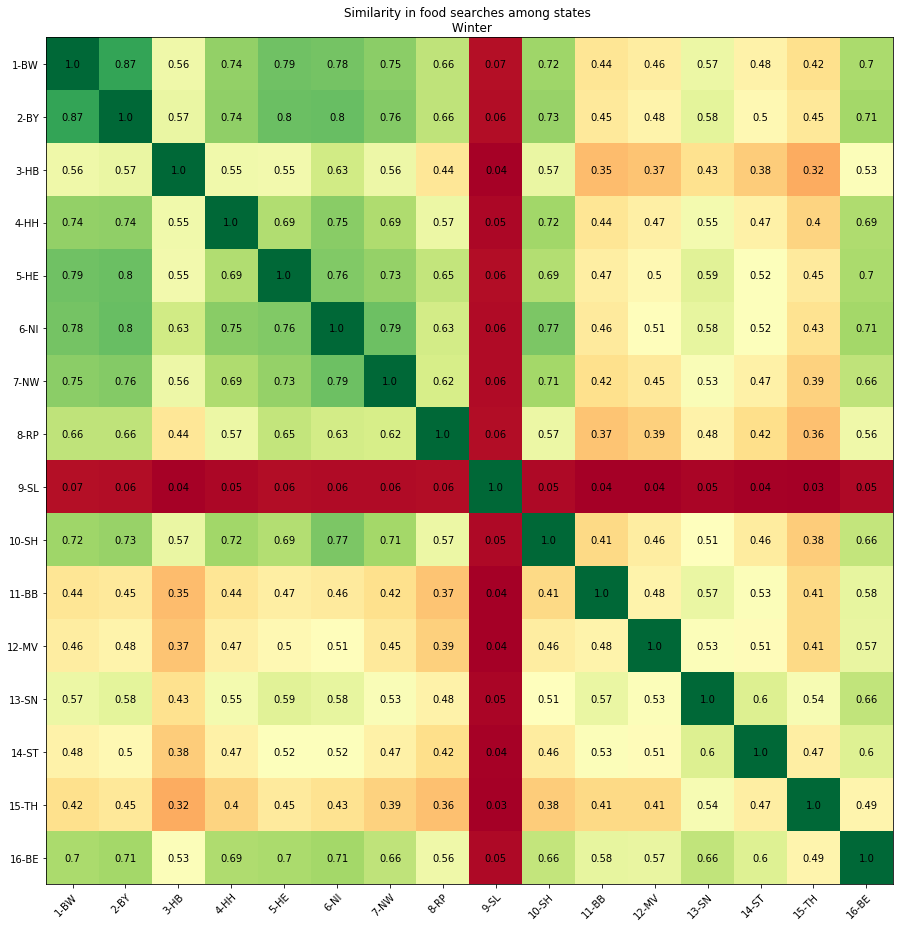

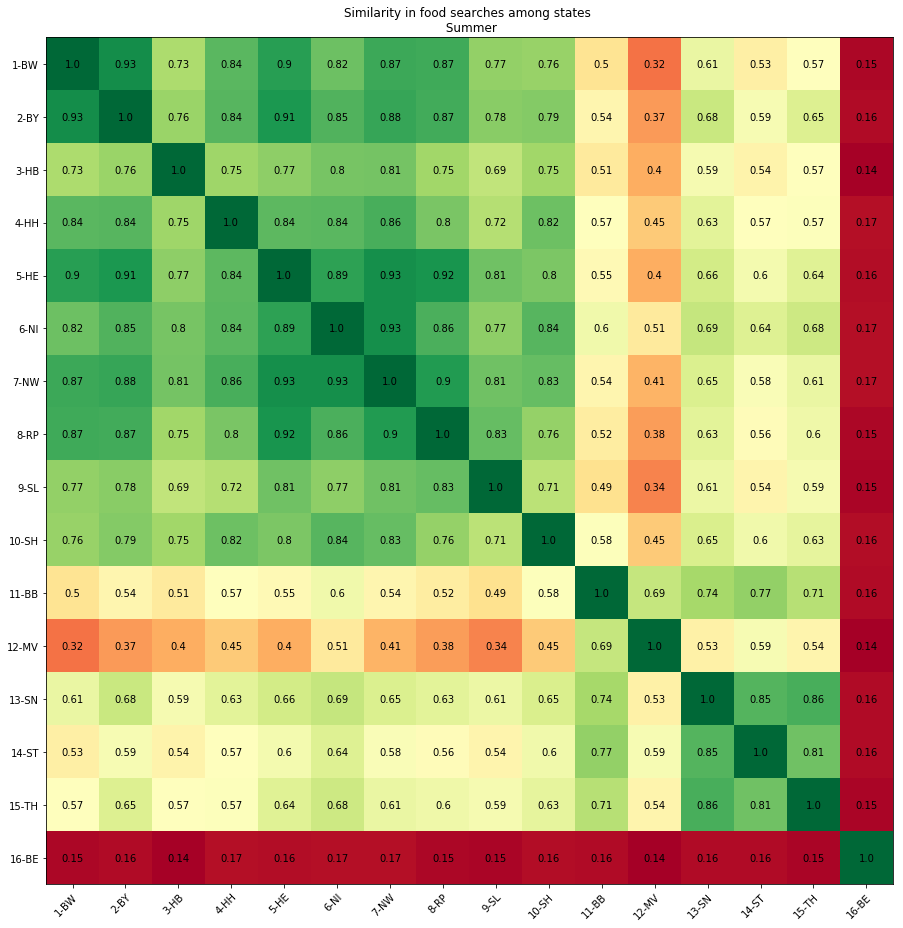

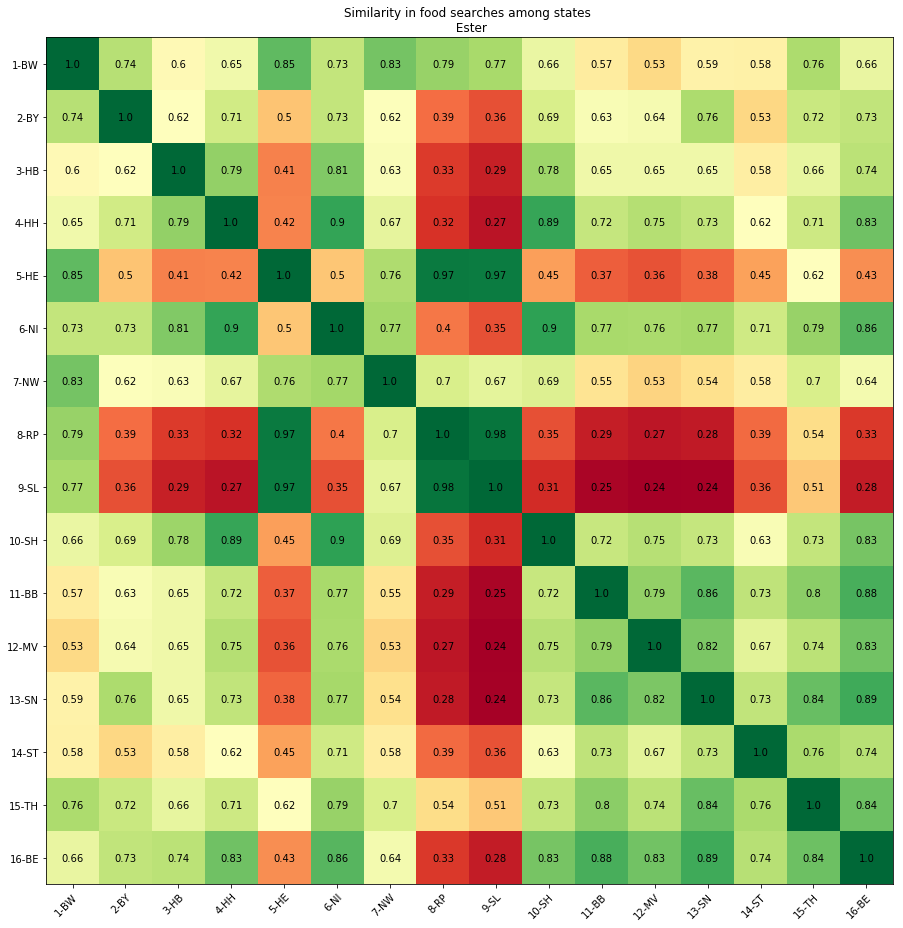

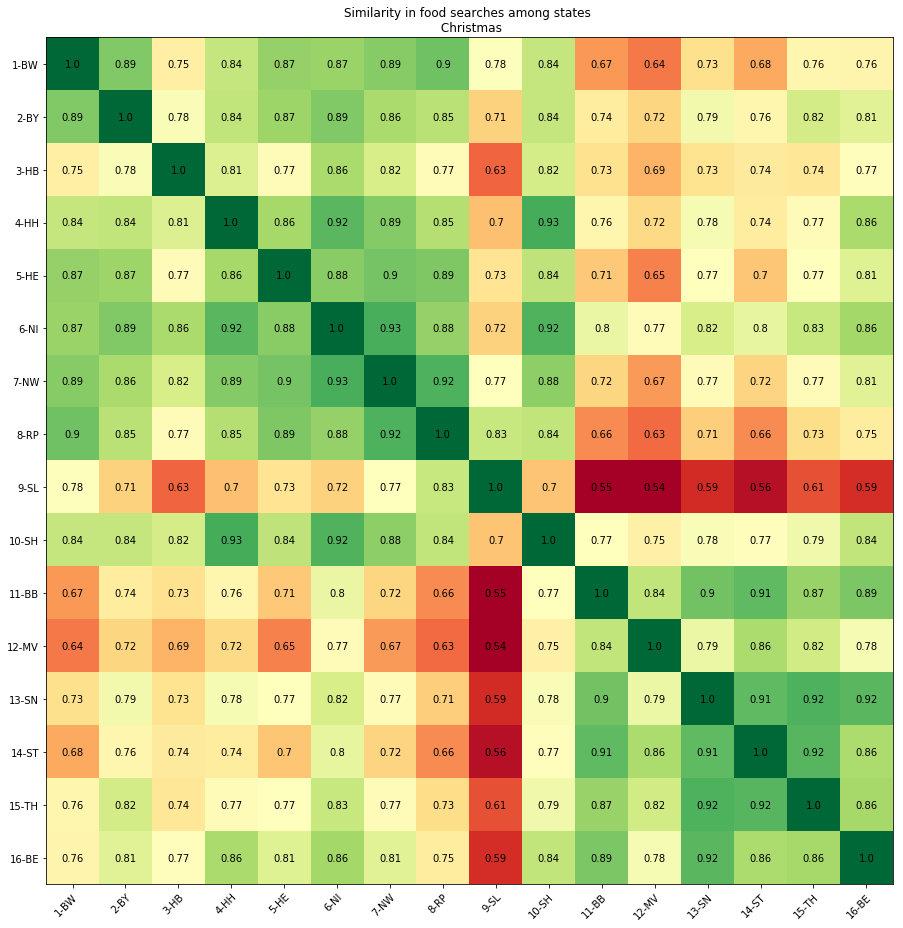

In [16]:


heat_plot(sim_m_w, states, 'Similarity in food searches among states \n Winter', 13, "sim_winter.png")
heat_plot(sim_m_s, states, "Similarity in food searches among states \n Summer", 13, "sim_summer.png")
heat_plot(sim_m_e, states, "Similarity in food searches among states \n Ester", 13, "sim_ester.png")
heat_plot(sim_m_c, states, "Similarity in food searches among states \n Christmas", 13, "sim_christmas.png")

In [159]:
df_sim_w = pd.read_csv("region_cos_sim_5days_winter.csv", index_col=0 )
df_sim_s = pd.read_csv("region_cos_sim_5days_summer.csv", index_col=0 )
df_sim_c = pd.read_csv("region_cos_sim_5days_christmas.csv", index_col=0 )
df_sim_e = pd.read_csv("region_cos_sim_5days_estern.csv", index_col=0 )


In [166]:
df_sim_w
#df_sim_s
#df_sim_c
#df_sim_e

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,1.000000,0.868437,0.556555,0.736704,0.788978,0.782568,0.749760,0.660734,0.065044,0.717538,0.438344,0.462059,0.565832,0.476891,0.423831,0.698864
2,0.868437,1.000000,0.566718,0.739818,0.796555,0.801965,0.759329,0.663480,0.063900,0.730813,0.451032,0.480672,0.583911,0.497303,0.445918,0.712955
3,0.556555,0.566718,1.000000,0.553826,0.548193,0.628134,0.560635,0.443478,0.041334,0.568095,0.353569,0.368275,0.429223,0.383211,0.324028,0.526198
4,0.736704,0.739818,0.553826,1.000000,0.689814,0.751192,0.693129,0.565856,0.052756,0.716590,0.438269,0.470526,0.546913,0.474454,0.398344,0.693557
5,0.788978,0.796555,0.548193,0.689814,1.000000,0.762773,0.734603,0.653507,0.063673,0.685517,0.465182,0.495631,0.589395,0.520875,0.454833,0.699482
6,0.782568,0.801965,0.628134,0.751192,0.762773,1.000000,0.792653,0.626404,0.058240,0.770662,0.456380,0.510412,0.576125,0.522063,0.433161,0.711539
7,0.749760,0.759329,0.560635,0.693129,0.734603,0.792653,1.000000,0.617503,0.058790,0.711011,0.424327,0.451646,0.529792,0.473591,0.393411,0.660601
8,0.660734,0.663480,0.443478,0.565856,0.653507,0.626404,0.617503,1.000000,0.060612,0.565799,0.369101,0.391409,0.478236,0.419403,0.359798,0.556735
9,0.065044,0.063900,0.041334,0.052756,0.063673,0.058240,0.058790,0.060612,1.000000,0.053312,0.035542,0.035623,0.046951,0.038380,0.034110,0.053660
10,0.717538,0.730813,0.568095,0.716590,0.685517,0.770662,0.711011,0.565799,0.053312,1.000000,0.408555,0.461017,0.513718,0.457829,0.384667,0.655913


In [179]:
sim_m_w = df_sim_w[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].values
sim_m_s = df_sim_s[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].values
sim_m_c = df_sim_c[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].values
sim_m_e = df_sim_e[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].values


In [183]:
# function to calculate the maximum similarity between regions, given a dataframe
def df_max_sim_between_regions(sim_matrix, states):
    
    df_High = pd.DataFrame(columns=['Highest_Region_Similarity','Regions_name'])
    
    for (index1,element1) in enumerate(sim_matrix):
        max_value=0
        max_index=0
        for (index2,element2) in enumerate(element1):
            
            # removing the same index we dont want that value, max_value  will get 2nd element value
            if (index1 != index2) and max_value < element2 :
                max_value=element2
                max_index=index2
        
        #print(max_value,states[index1],states[max_index])
        df_High=df_High.append({'Highest_Region_Similarity':max_value,'Regions_name':states[index1]+'-'+states[max_index] }, ignore_index=True)
    
    df_High.sort_values(by=['Highest_Region_Similarity'],inplace=True,ascending=False)
        
    return df_High



In [184]:
high_w = df_max_sim_between_regions(sim_m_w, states)
high_s = df_max_sim_between_regions(sim_m_s, states)
high_c = df_max_sim_between_regions(sim_m_c, states)
high_e = df_max_sim_between_regions(sim_m_e, states)

In [ ]:
high_w
high_s
high_c
high_e

In [194]:
import seaborn as sns

def plot_max_sim_regions(df, title, filename, size1, size2):
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (size1,size2)
    
    #plt.rcParams['figure.figsize'] = (15, 8)
    #plt.style.use('dark_background')
    
    Region_name = df['Regions_name']
    High_similarity=df['Highest_Region_Similarity']

    #sns.lineplot(Region_name, High_similarity, color = 'red')
    plt.plot(Region_name, High_similarity, '-o') 
    plt.title(title, fontsize = 20,weight='bold')
    plt.xlabel('Regions',fontsize=15,weight='bold') 
    plt.ylabel('Cosine similarity value',fontsize=15,weight='bold') 
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10)
    plt.ylim(0, 1)

    #plt.grid()
    plt.show()
    fig.savefig(filename)
    return



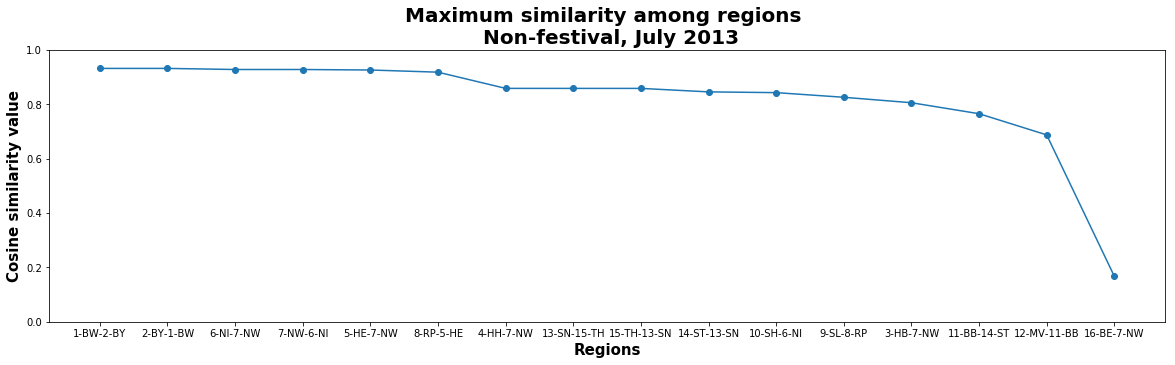

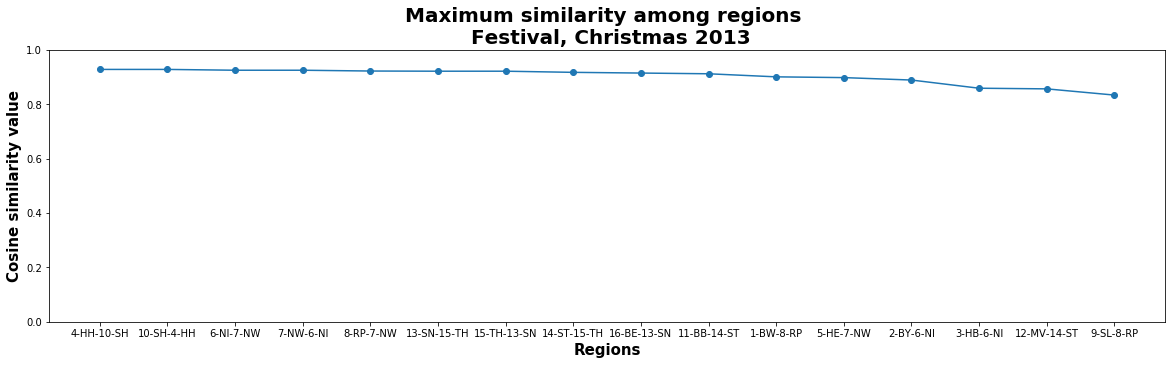

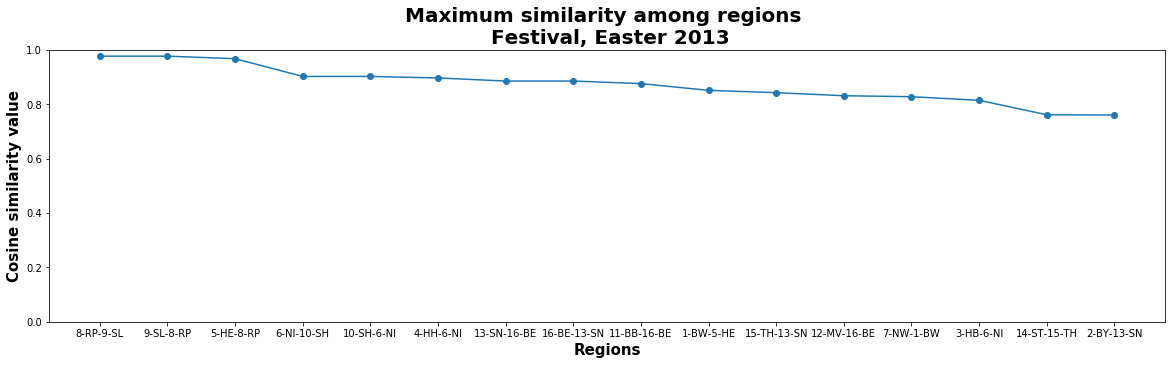

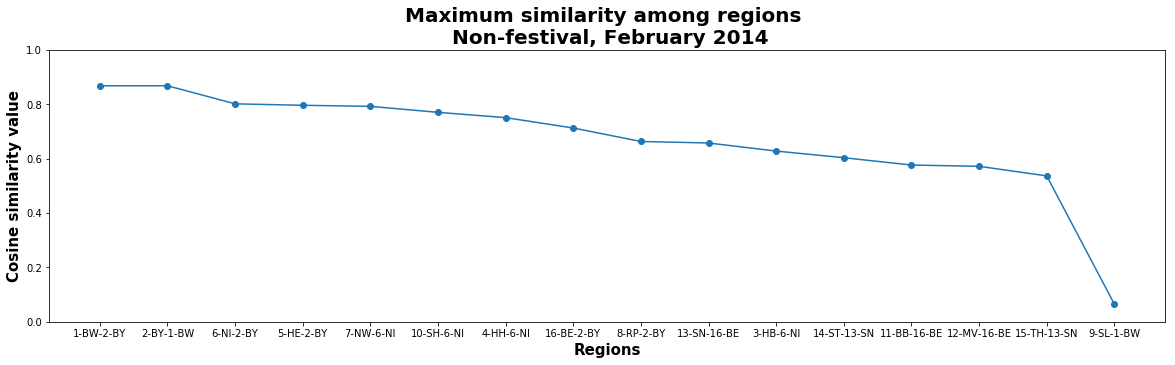

In [205]:

plot_max_sim_regions(high_s, "Maximum similarity among regions \n Non-festival, July 2013", "max_sim_summer.jpg", 20,5)
plot_max_sim_regions(high_c, "Maximum similarity among regions \n Festival, Christmas 2013", "max_sim_christmas.jpg", 20,5)
plot_max_sim_regions(high_e, "Maximum similarity among regions \n Festival, Easter 2013", "max_sim_easter.jpg", 20,5)
plot_max_sim_regions(high_w, "Maximum similarity among regions \n Non-festival, February 2014", "max_sim_winter.jpg", 20,5)

In [206]:

def trimm_cities(full_df, cities):
    trimmed_df = full_df[full_df.city.isin(cities)].copy()
    trimmed_df = trimmed_df.reset_index(drop=True)
    
    return trimmed_df

In [221]:
cities1 = ['Stuttgart','Frankfurt_Am_Main','Bremen','Potsdam','Rostock','Hamburg']
#cities2 =

df_w_trimm = trimm_cities(df_w, cities1)
df_s_trimm = trimm_cities(df_s, cities1)
df_c_trimm = trimm_cities(df_c, cities1)
df_e_trimm = trimm_cities(df_e, cities1)


In [216]:
# function that calculates tf by all the cities present on the dataframe and then calculates and returns a
# cosine similarity matrix
def create_cos_sim_by_cities(df):
    #extract cities from dataset
    cities = df['city'].tolist()

    #create a list of distinct cities, alphabetic order
    cities = sorted(set(cities))

    #create a list of distict recipe names, alphabetic order
    all_recipes = df['recipe_name'].tolist()
    all_recipes = sorted(set(all_recipes))

    #create a new dataset for store recipe names, by cities
    df_tf = pd.DataFrame(cities, columns=['city'])
    df_tf.set_index('city', inplace=True)

    #add recipes as columns
    df_tf = df_tf.reindex(columns = all_recipes, fill_value=0)

    #fill the tf_Matrix
    for n in range ( len(df) ):
        df_tf.loc[ df.loc[n,'city'], df.loc[n,'recipe_name'] ] += 1
        
    return cosine_similarity(df_tf, df_tf)

In [231]:
c_sim_m_w = create_cos_sim_by_cities(df_w_trimm)
c_sim_m_s = create_cos_sim_by_cities(df_s_trimm)
c_sim_m_c = create_cos_sim_by_cities(df_c_trimm)
c_sim_m_e = create_cos_sim_by_cities(df_e_trimm)

KeyboardInterrupt: 

In [ ]:
c_sim_m_w
c_sim_m_s
c_sim_m_c
c_sim_m_e

In [224]:


#'Stuttgart','Frankfurt_Am_Main','Bremen','Potsdacity_d.xlsxm','Rostock','Hamburg'


,Stuttgart,Frankfurt_Am_Main,Bermen,Potsdam,Rostock,Hamburg
0,1.00,210.16,631.83,602.02,826.09,655.70
1,210.16,1.00,473.67,520.98,670.74,498.23
2,631.83,473.67,1.00,365.90,301.26,128.76
3,602.02,520.98,365.90,1.00,230.14,286.50
4,826.09,670.74,301.26,230.14,1.00,191.49
5,655.70,498.23,128.76,286.50,191.49,1.00


In [230]:
df_city_distance

,Stuttgart,Frankfurt_Am_Main,Bermen,Potsdam,Rostock,Hamburg
0,1.00,210.16,631.83,602.02,826.09,655.70
1,210.16,1.00,473.67,520.98,670.74,498.23
2,631.83,473.67,1.00,365.90,301.26,128.76
3,602.02,520.98,365.90,1.00,230.14,286.50
4,826.09,670.74,301.26,230.14,1.00,191.49
5,655.70,498.23,128.76,286.50,191.49,1.00


In [228]:
def plot_by_city_sim(city_sim_matrix, list_of_cities, source_file, plt_ny,plt_nx, title, oder,filename):
    
    df_city_distance = pd.read_excel(source_file)
    del df_city_distance['City']
    
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (30,20)
    fig, axs = plt.subplots(plt_ny, plt_nx)

    for (index1,element1) in enumerate(city_sim_matrix):
        Dataframe_Plot = pd.DataFrame(columns=[list_of_cities[index1]+'_City','Cosine_similarity','factor'])
        cities = []
        Cosine_similarity=[]
        factor=[]
        max_value=0
        max_index=0
        for(index2,element2) in enumerate(element1):
            if (index1 != index2):
                Cosine_similarity.append(element2)
                cities.append(list_of_cities[index2])
                factor.append(df_city_distance.values[index1][index2])
        Dataframe_Plot["Cosine_similarity"]=Cosine_similarity
        Dataframe_Plot[list_of_cities[index1]+'_City']=cities
        Dataframe_Plot['factor']=factor
        Dataframe_Plot.sort_values(by=['factor'],inplace=True ,ascending=oder)
        print(Dataframe_Plot)
        x=Dataframe_Plot[list_of_cities[index1]+'_City']
        y=Dataframe_Plot["Cosine_similarity"]
        axs[index1%3,index1%2].plot(x, y, 'tab:orange')
        axs[index1%3,index1%2].set(xlabel=list_of_cities[index1]+'_City', ylabel='Cosine_simlarity',title='Similarity between '+list_of_cities[index1]+' city and other cities order by ' + title, ylim=(0,1))
        plt.rc('xtick', labelsize=10) 
        plt.rc('ytick', labelsize=10)

    plt.show()
    fig.savefig(filename)
    return

In [ ]:
plot_by_city_sim(c_sim_m_w, cities1, "city_d.xlsx", 3, 2, "distance during Non Festival time(February)", True, "sim_cities_winter_distance.jpg")
plot_by_city_sim(c_sim_m_s, cities1, "city_d.xlsx", 3, 2, "distance during Non Festival time(July)", True, "sim_cities_summer_distance.jpg")
plot_by_city_sim(c_sim_m_c, cities1, "city_d.xlsx", 3, 2, "distance during Festival time(Christmas)", True, "sim_cities_christmas_distance.jpg")
plot_by_city_sim(c_sim_m_e, cities1, "city_d.xlsx", 3, 2, "distance during Festival time(Easter)", True, "sim_cities_easter_distance.jpg")
